# 1. Построение решающего дерева для задачи классификации на примере предсказания дефолта по кредиту

Импортируем pandas.

In [ ]:
import pandas as pd

Загрузим данные.

In [ ]:
credits = pd.read_csv('https://drive.google.com/uc?export=download&id=1iSfX_jQeKo2p0LnJe3SllPY5wzuNtvpN', index_col=0)
credits

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


В данных нет категориальных столбцов.

В данных есть пропуски. Далее заполним их.

In [ ]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

В обоих столбцах, содержащих пропуски, большая часть элементов принимает малые значения, и при этом существует небольшое количество элементов, принимающих большие значения.

Из-за этого в обоих столбцах среднее значение сильно смещено в сторону больших значений относительно медианы. Поэтому заполним пропуски в столбцах медианой, а не средним значением.

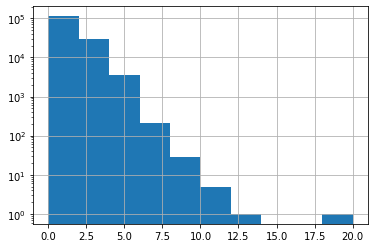

In [ ]:
credits['NumberOfDependents'].hist(log=True)

In [ ]:
print('Среднее значение: ', credits['NumberOfDependents'].mean())
print('Медиана: ', credits['NumberOfDependents'].median())

Среднее значение:  0.7572222678605657
Медиана:  0.0


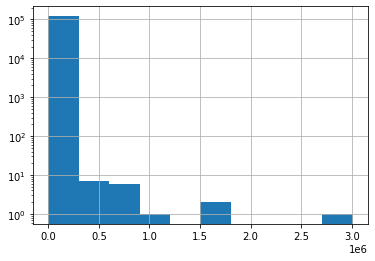

In [ ]:
credits['MonthlyIncome'].hist(log=True)

In [ ]:
print('Среднее значение: ', credits['MonthlyIncome'].mean())
print('Медиана: ', credits['MonthlyIncome'].median())

Среднее значение:  6670.221237392844
Медиана:  5400.0


In [ ]:
credits = credits.fillna(credits.median())
credits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         150000 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    150000 non-null  float64
dtype

Разделим выборку на обучающую и тестовую.

In [ ]:
from sklearn.model_selection import train_test_split

credits_x_train, credits_x_test, credits_y_train, credits_y_test = train_test_split(credits.drop('SeriousDlqin2yrs', axis=1), credits['SeriousDlqin2yrs'], test_size=0.2)

Классы очень несбалансированны, количество заемщиков, не вернувших кредит, невелико.

In [ ]:
credits_y_train.value_counts()

0    111941
1      8059
Name: SeriousDlqin2yrs, dtype: int64

In [ ]:
credits_y_test.value_counts()

0    28033
1     1967
Name: SeriousDlqin2yrs, dtype: int64

Обучим модель решающего дерева.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

credits_tree = DecisionTreeClassifier(max_depth=200, min_samples_leaf=20).fit(credits_x_train, credits_y_train)
credits_prediction_train = credits_tree.predict(credits_x_train)
credits_prediction_test = credits_tree.predict(credits_x_test)

Создадим функцию, которая принимает на вход классификатор и данные и возвращает вероятности принадлежности элементов выборки к классу 1. Эти вероятности нужны, в частности, для вычисления метрики AUC ROC.

In [ ]:
def class_1_probabilities(classifier, data):
    class_probabilities = classifier.predict_proba(data)
    class1_index = list(classifier.classes_).index(1)
    return class_probabilities[:, class1_index]

Качество модели получилось достаточно низким. 

Возможно, качество модели можно несколько улучшить путем более тщательного подбора гиперпараметров. Однако, основная причина низкого качества модели в том, что одиночное решающее дерево в большинстве случаев – достаточно слабый классификатор.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print('Accuracy on train: ', accuracy_score(credits_y_train, credits_prediction_train))
print('Accuracy on test: ', accuracy_score(credits_y_test, credits_prediction_test))
print()
print('Precision on train: ', precision_score(credits_y_train, credits_prediction_train))
print('Precision on test: ', precision_score(credits_y_test, credits_prediction_test))
print()
print('Recall on train: ', recall_score(credits_y_train, credits_prediction_train))
print('Recall on test: ', recall_score(credits_y_test, credits_prediction_test))
print()
print('F1 on train: ', f1_score(credits_y_train, credits_prediction_train))
print('F1 on test: ', f1_score(credits_y_test, credits_prediction_test))
print()
print('AUC ROC on train: ', roc_auc_score(credits_y_train, class_1_probabilities(credits_tree, credits_x_train)))
print('AUC ROC on test: ', roc_auc_score(credits_y_test, class_1_probabilities(credits_tree, credits_x_test)))

Accuracy on train:  0.94225
Accuracy on test:  0.9347333333333333

Precision on train:  0.6750387596899224
Precision on test:  0.5059132720105125

Recall on train:  0.2701327708152376
Recall on test:  0.19572953736654805

F1 on train:  0.38585607940446653
F1 on test:  0.28225806451612906

AUC ROC on train:  0.9387244835589393
AUC ROC on test:  0.7853060951423164


# 2. Построение и оценка решающего дерева для задачи классификации на примере прогнозирования дохода потенциальных клиентов банка

В файлах с данными нет названий столбцов, так что укажем их вручную.

In [ ]:
columns_list = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship',
                'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'salary']

Загрузим обучающую выборку.

In [ ]:
train = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', names=columns_list, header=None)

Загрузим тестовую выборку.

Первая строка файла выглядит так: "|1x3 Cross validator".

Эта строка не только не содержит полезной информации, но и мешает правильному преобразованию файла в DataFrame. Удалим ее.

In [ ]:
test = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', names=columns_list, header=None, skiprows=1)

Выведем первые 10 строк обучающей выборки.

In [ ]:
train.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


Выведем размерность обучающей выборки.

In [ ]:
train.shape

(32561, 15)

Выведите количество пропущенных значений и тип для каждой переменной обучающей выборки.

Видно, что пропущенных значений нет.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Выведем первые 10 строк тестовой выборки.

In [ ]:
test.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K.
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K.
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K.
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K.


Выведем размерность тестовой выборки.

In [ ]:
test.shape

(16281, 15)

Выведите количество пропущенных значений и тип для каждой переменной тестовой выборки.

Видно, что пропущенных значений нет.

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       16281 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education-num   16281 non-null  int64 
 5   marital-status  16281 non-null  object
 6   occupation      16281 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital-gain    16281 non-null  int64 
 11  capital-loss    16281 non-null  int64 
 12  hours-per-week  16281 non-null  int64 
 13  native-country  16281 non-null  object
 14  salary          16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


Формат целевой переменной отличается в обучающей и тестовой выборках.

Чтобы дальнейшая предобработка происходила правильно, преобразуем целевую переменную тестовой выборки к формату обучающей выборки.

In [ ]:
train['salary'].value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

In [ ]:
test['salary'].value_counts()

 <=50K.    12435
 >50K.      3846
Name: salary, dtype: int64

In [ ]:
test['salary'] = test['salary'].apply(lambda x: x[:-1])
test['salary'].value_counts()

 <=50K    12435
 >50K      3846
Name: salary, dtype: int64

Проведем предобработку обучающей и тестовой выборок.

In [ ]:
# Удалим лишние признаки
train.drop(['native-country'], axis=1, inplace=True)
test.drop(['native-country'], axis=1, inplace=True)

# Преобразуем целевую переменную в бинарные значения, ниже 50 тысяч - 0, выше -1
train['salary'] = (train['salary'] != ' <=50K').astype('int32')
test['salary'] = (test['salary'] != ' <=50K').astype('int32')

# Преобразуем категориальные данные в числовые
train = pd.get_dummies(train, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex'])
test = pd.get_dummies(test, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex'])

Выведем на экран промежуточные результаты предобработки обучающей выборки.

In [ ]:
train.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


Выведем на экран промежуточные результаты предобработки тестовой выборки.

In [ ]:
test.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,25,226802,7,0,0,40,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
1,38,89814,9,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,28,336951,12,0,0,40,1,0,0,1,...,0,0,0,0,0,0,0,1,0,1
3,44,160323,10,7688,0,40,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,18,103497,10,0,0,30,0,1,0,0,...,1,0,0,0,0,0,0,1,1,0


Проведем нормализацию нуждающихся в этом признаков обучающей и тестовой выборок.

In [ ]:
# Нормализовать нуждающиеся в этом признаки
a_features = train[['age', 'education-num', 'hours-per-week', 'fnlwgt', 'capital-gain', 'capital-loss']].values
norm_features = (a_features - a_features.mean(axis=0)) / a_features.std(axis=0)
train.loc[:, ['age', 'education-num', 'hours-per-week', 'fnlwgt', 'capital-gain', 'capital-loss']] = norm_features

a_features = test[['age', 'education-num', 'hours-per-week', 'fnlwgt', 'capital-gain', 'capital-loss']].values
norm_features = (a_features - a_features.mean(axis=0)) / a_features.std(axis=0)
test.loc[:, ['age', 'education-num', 'hours-per-week', 'fnlwgt', 'capital-gain', 'capital-loss']] = norm_features

Выведем на экран подмножество обучающей выборки после нормализации.

In [ ]:
train.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


Выведем на экран размерность обучающей выборки. Количество столбцов увеличилось после one-hot кодирования.

In [ ]:
train.shape

(32561, 67)

Выведем на экран подмножество тестовой выборки после нормализации.

In [ ]:
test.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,-0.994129,0.353474,-1.196864,-0.142662,-0.218062,-0.031432,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
1,-0.055417,-0.942391,-0.417886,-0.142662,-0.218062,0.769918,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,-0.777503,1.395450,0.750582,-0.142662,-0.218062,-0.031432,1,0,0,1,...,0,0,0,0,0,0,0,1,0,1
3,0.377835,-0.275397,-0.028397,0.871091,-0.218062,-0.031432,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,-1.499590,-0.812954,-0.028397,-0.142662,-0.218062,-0.832781,0,1,0,0,...,1,0,0,0,0,0,0,1,1,0


Выведем на экран размерность тестовой выборки. Количество столбцов увеличилось после one-hot кодирования.

In [ ]:
test.shape

(16281, 67)

Отделим целевую переменную от данных.

In [ ]:
x_train = train.drop('salary', axis=1)
x_test = test.drop('salary', axis=1)
y_train = train['salary']
y_test = test['salary']

Видно, что классы несбалансированны.

In [ ]:
y_train.value_counts()

0    24720
1     7841
Name: salary, dtype: int64

In [ ]:
y_test.value_counts()

0    12435
1     3846
Name: salary, dtype: int64

Обучим модель решающего дерева

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=200, min_samples_leaf=20).fit(x_train, y_train)

Вычислим прогнозы на обучающей и тестовой выборках

In [ ]:
prediction_train = tree.predict(x_train)
prediction_test = tree.predict(x_test)
prediction_train

array([0, 0, 0, ..., 0, 0, 1], dtype=int32)

Вычислим значения метрик для построенного классификатора. Значения метрик получились достаточно неплохими, и их можно улучшить с помощью подбора гиперпараметров

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print('Accuracy on train: ', accuracy_score(y_train, prediction_train))
print('Accuracy on test: ', accuracy_score(y_test, prediction_test))
print()
print('Precision on train: ', precision_score(y_train, prediction_train))
print('Precision on test: ', precision_score(y_test, prediction_test))
print()
print('Recall on train: ', recall_score(y_train, prediction_train))
print('Recall on test: ', recall_score(y_test, prediction_test))
print()
print('F1 on train: ', f1_score(y_train, prediction_train))
print('F1 on test: ', f1_score(y_test, prediction_test))
print()
print('AUC ROC on train: ', roc_auc_score(y_train, class_1_probabilities(tree, x_train)))
print('AUC ROC on test: ', roc_auc_score(y_test, class_1_probabilities(tree, x_test)))

Accuracy on train:  0.8785356715088602
Accuracy on test:  0.845095510103802

Precision on train:  0.7939485627836611
Precision on test:  0.7048267326732673

Recall on train:  0.6693023848998852
Recall on test:  0.5923036921476859

F1 on train:  0.7263165178880355
F1 on test:  0.6436846566826787

AUC ROC on train:  0.9409333753702737
AUC ROC on test:  0.8870149426001166


Подберем лучшие гиперпараметры. В качестве метрики для подбора гиперпараметров будем использовать AUC ROC.

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from datetime import datetime

In [ ]:
start_time = datetime.now()

param_grid = {'max_depth': np.linspace(100, 250, 10, dtype=int), 'min_samples_leaf': np.linspace(20, 80, 10, dtype=int)}

cv = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
cv.fit(x_train, y_train)

print('Execution time:')
print(datetime.now() - start_time)

Execution time:
0:01:00.591926


Получим классификатор с лучшими гиперпараметрами

In [ ]:
best_tree = cv.best_estimator_
best_tree

DecisionTreeClassifier(max_depth=100, min_samples_leaf=53)

In [ ]:
cv.best_score_

0.9040535305498192

Вычислим прогнозы на обучающей и тестовой выборках

In [ ]:
prediction_train = best_tree.predict(x_train)
prediction_test = best_tree.predict(x_test)
prediction_train

array([0, 0, 0, ..., 0, 0, 1], dtype=int32)

Получим вероятности принадлежности к классам для тестовой выборки

In [ ]:
class_probabilities_test = best_tree.predict_proba(x_test)
class_probabilities_test

array([[1.        , 0.        ],
       [0.8988764 , 0.1011236 ],
       [0.64788732, 0.35211268],
       ...,
       [0.25925926, 0.74074074],
       [0.83636364, 0.16363636],
       [0.33333333, 0.66666667]])

Получим вероятности принадлежности элементов тестовой выборки к классу 1 (>50k)

In [ ]:
probabilities_test = class_1_probabilities(best_tree, x_test)
probabilities_test

array([0.        , 0.1011236 , 0.35211268, ..., 0.74074074, 0.16363636,
       0.66666667])

Построим график распределения вероятностей принадлежности элементов тестовой выборки к классу 1 (>50k)

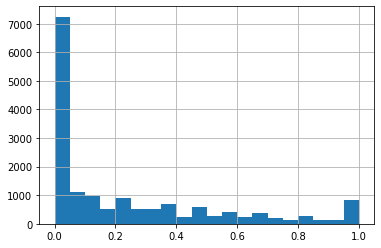

In [ ]:
pd.Series(probabilities_test).hist(bins=20)

С помощью подбора гиперпараметров действительно удалось улучшить значения метрик.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print('Accuracy on train: ', accuracy_score(y_train, prediction_train))
print('Accuracy on test: ', accuracy_score(y_test, prediction_test))
print()
print('Precision on train: ', precision_score(y_train, prediction_train))
print('Precision on test: ', precision_score(y_test, prediction_test))
print()
print('Recall on train: ', recall_score(y_train, prediction_train))
print('Recall on test: ', recall_score(y_test, prediction_test))
print()
print('F1 on train: ', f1_score(y_train, prediction_train))
print('F1 on test: ', f1_score(y_test, prediction_test))
print()
print('AUC ROC on train: ', roc_auc_score(y_train, class_1_probabilities(best_tree, x_train)))
print('AUC ROC on test: ', roc_auc_score(y_test, class_1_probabilities(best_tree, x_test)))

Accuracy on train:  0.8677559043026934
Accuracy on test:  0.85553712916897

Precision on train:  0.7805110299952388
Precision on test:  0.7496657754010695

Recall on train:  0.6272159163372019
Recall on test:  0.5832033281331254

F1 on train:  0.6955169000141422
F1 on test:  0.6560397777127815

AUC ROC on train:  0.9264421977622397
AUC ROC on test:  0.9004710610619842


Построим ROC-кривые для обучающей и тестовой выборок.

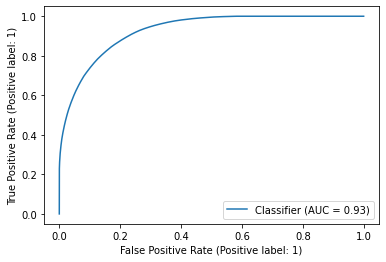

In [ ]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_train, class_1_probabilities(best_tree, x_train))

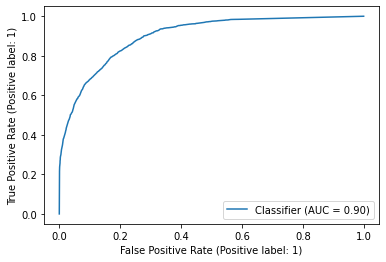

In [ ]:
RocCurveDisplay.from_predictions(y_test, class_1_probabilities(best_tree, x_test))